In [20]:
from pathlib import Path
import sys

# Add the parent directory to sys.path to import preprocessing.py
sys.path.append(str(Path().resolve().parent / 'src'))

# Variables available_styles, data, data_path, df, df_all, file_path, ticker, tickers are already defined in the notebook.


In [25]:
aapl_data = data['AAPL'].copy()

In [26]:
from statsmodels.tsa.stattools import adfuller

# Convert to numeric and drop NaN
aapl_numeric = pd.to_numeric(aapl_data['AAPL'], errors='coerce').dropna()

# ADF Test
result = adfuller(aapl_numeric)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 0.844822194672064
p-value: 0.9923262905345644


In [27]:
from statsmodels.tsa.arima.model import ARIMA

# (p,d,q) example: ARIMA(1,1,1)
model = ARIMA(aapl_numeric, order=(1, 1, 1))
fitted_model = model.fit()
print(fitted_model.summary())

c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5215.293
Date:                Sat, 07 Jun 2025   AIC                          10436.586
Time:                        23:48:50   BIC                          10454.074
Sample:                             0   HQIC                         10442.933
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5412      0.373      1.452      0.146      -0.189       1.272
ma.L1         -0.5617      0.368     -1.525      0.127      -1.284       0.160
sigma2         3.7103      0.053     70.230      0.0

c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\GODIWOUR\AppData\Local\anaconda\envs\stock_forecast\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


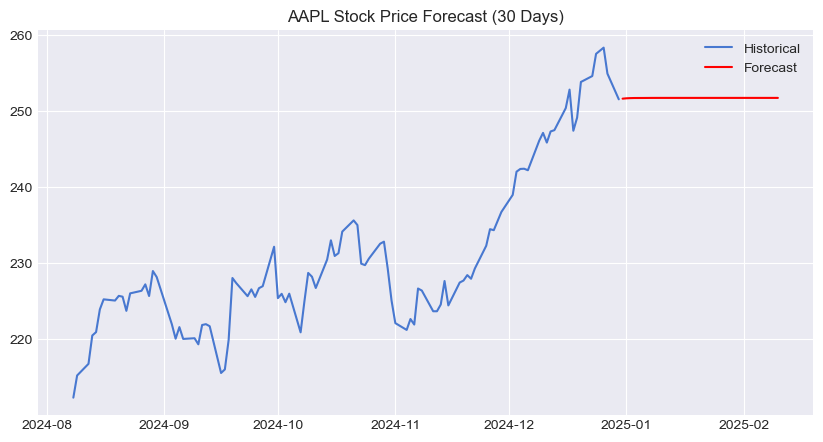

In [28]:
# Use the last valid date in the index (excluding NaT)
last_valid_date = aapl_data.index[aapl_data.index.notnull()][-1]
forecast = fitted_model.forecast(steps=30)
forecast.index = pd.date_range(start=last_valid_date, periods=31, freq='B')[1:]  # Business days

plt.figure(figsize=(10, 5))
plt.plot(aapl_numeric.iloc[-100:], label="Historical")
plt.plot(forecast, label="Forecast", color='red')
plt.title("AAPL Stock Price Forecast (30 Days)")
plt.legend()
plt.show()